# Install

You need to install the following packages:
 - Numpy
 - Scipy
 - Matplotlib
 - Jupyter notebook
 - Fenics

----

The Fenics install page is here: https://fenicsproject.org/download/

Previous classes found that using Anaconda was the easiest way to do the installation. 

0. (Windows only) Install WSL or WSL2. https://docs.microsoft.com/en-us/windows/wsl/install
1. Install Anaconda. https://www.anaconda.com/
2. Create conda environment:

conda create -n fenics_environment

3. Activate the environment

conda activate fenics_environment

4. Install packages (recommended to install in this order). Fenics install may take a long time (20 mins on my laptop)

conda install numpy

conda install scipy

conda install matplotlib

conda install notebook

conda install -c conda-forge fenics

5. Run Jupyter notebook

jupyter notebook

6. Open jupyter notebook in browser

----

Next time you want to use fenics (e.g., another day):

1. conda activate fenics_environment

2. jupyter notebook

In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt

# Mesh

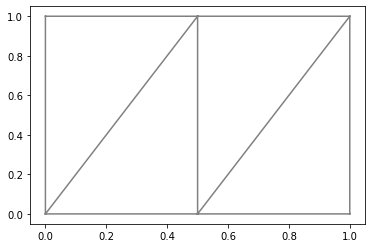

In [2]:
mesh = dl.UnitSquareMesh(2,1)
dl.plot(mesh)

In [3]:
mesh.coordinates()

array([[0. , 0. ],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

Text(0.5, 1.0, 'mesh. red stars are mesh vertices')

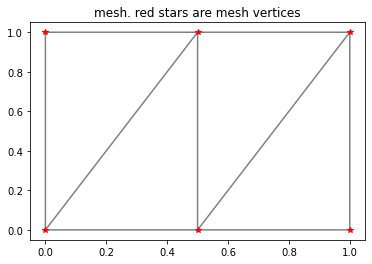

In [4]:
dl.plot(mesh)
plt.plot(mesh.coordinates()[:,0], mesh.coordinates()[:,1], '*r')
plt.title('mesh. red stars are mesh vertices')

Text(0.5, 1.0, 'mesh. red stars are mesh vertices')

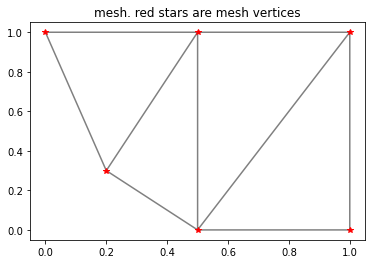

In [5]:
mesh.coordinates()[0,:] = np.array([0.2, 0.3])
dl.plot(mesh)
plt.plot(mesh.coordinates()[:,0], mesh.coordinates()[:,1], '*r')
plt.title('mesh. red stars are mesh vertices')

In [6]:
mesh.cells()

array([[0, 1, 4],
       [0, 3, 4],
       [1, 2, 5],
       [1, 4, 5]], dtype=uint32)

In [7]:
vertex_indices_for_first_cell = mesh.cells()[0,:]
vertex_coords_for_first_cell = mesh.coordinates()[vertex_indices_for_first_cell, :]
print('vertex_coords_for_first_cell=\n', vertex_coords_for_first_cell)

vertex_coords_for_first_cell=
 [[0.2 0.3]
 [0.5 0. ]
 [0.5 1. ]]


Text(0.5, 1.0, 'red stars are vertices for first cell')

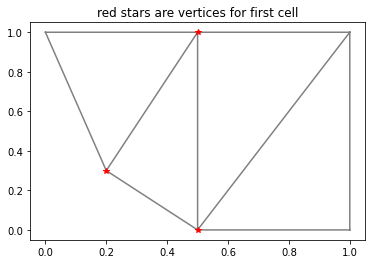

In [8]:
dl.plot(mesh)
plt.plot(vertex_coords_for_first_cell[:,0], vertex_coords_for_first_cell[:,1], '*r')
plt.title('red stars are vertices for first cell')

# Function Space and Functions

In [9]:
V = dl.FunctionSpace(mesh, 'CG', 1)
print ('Number of dofs', V.dim())

Number of dofs 6


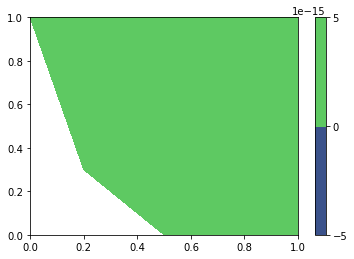

In [10]:
f = dl.Function(V)
f.vector()[:]
cm = dl.plot(f)
plt.colorbar(cm)

f.vector()[:]= [0. 0. 0. 1. 0. 0.]


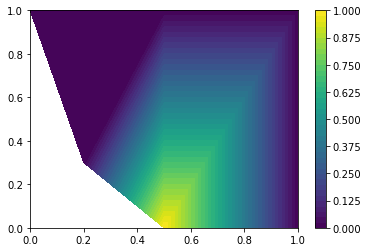

In [11]:
f.vector()[3] = 1.0
print('f.vector()[:]=', f.vector()[:])
cm = dl.plot(f)
plt.colorbar(cm)

f.vector()[:]= [0.  0.  0.  1.  1.5 0. ]


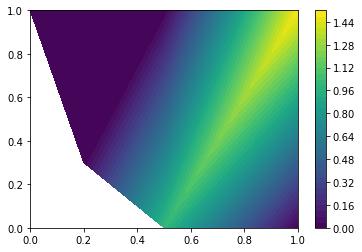

In [12]:
f.vector()[4] = 1.5
print('f.vector()[:]=', f.vector()[:])
cm = dl.plot(f)
plt.colorbar(cm)

In [13]:
f(1.0, 1.0)

1.5

In [14]:
f(0.6, 0.6)

0.7

In [15]:
f(0.2, 0.8)

0.0

In [16]:
V.tabulate_dof_coordinates()

array([[0. , 1. ],
       [0.2, 0.3],
       [0.5, 1. ],
       [0.5, 0. ],
       [1. , 1. ],
       [1. , 0. ]])

In [17]:
mesh.coordinates()

array([[0.2, 0.3],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

# Expressions and interpolation

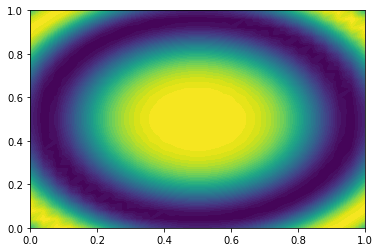

In [47]:
mesh = dl.UnitSquareMesh(25,25)
V = dl.FunctionSpace(mesh, 'CG', 1)

E = dl.Expression('cos(15*(pow(x[0] - 0.5,2) + pow(x[1] - 0.5,2)))', degree=3)
dl.plot(E, mesh=mesh)

In [48]:
E(0.5, 0.5)

1.0

In [49]:
E(0.0, 0.0)

0.3466353178350258

In [50]:
E.vector()

AttributeError: 

In [51]:
E_function = dl.interpolate(E, V)
E_function.vector()[:]

array([ 0.34663532,  0.80160896,  0.80160896,  0.99364317,  0.99790026,
        0.99364317,  0.93334149,  0.89463384,  0.89463384,  0.93334149,
        0.6972909 ,  0.58721272,  0.54769853,  0.58721272,  0.6972909 ,
        0.37797774,  0.19436594,  0.09944637,  0.09944637,  0.19436594,
        0.37797774,  0.05158811, -0.18727662, -0.32630218, -0.37128167,
       -0.32630218, -0.18727662,  0.05158811, -0.23419356, -0.50068418,
       -0.65666559, -0.7259323 , -0.7259323 , -0.65666559, -0.50068418,
       -0.23419356, -0.45857322, -0.7259323 , -0.86860944, -0.93072453,
       -0.94720041, -0.93072453, -0.86860944, -0.7259323 , -0.45857322,
       -0.61972243, -0.86860944, -0.97357345, -0.99926253, -0.998342  ,
       -0.998342  , -0.99926253, -0.97357345, -0.86860944, -0.61972243,
       -0.7259323 , -0.94720041, -0.99995399, -0.96901312, -0.92353721,
       -0.90407214, -0.92353721, -0.96901312, -0.99995399, -0.94720041,
       -0.7259323 , -0.78851396, -0.98340986, -0.97974892, -0.88

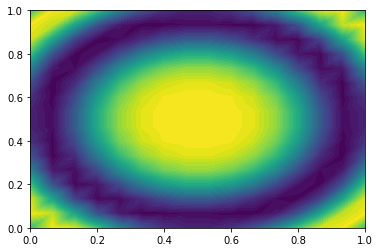

In [25]:
dl.plot(E_function)

# Solving Poisson PDE

Let's solve $$\begin{cases}
-\Delta u = f & \text{in } [0,1], \\
u(0) = 10 \\
u(1) = 3
\end{cases}$$

1D mesh and function space

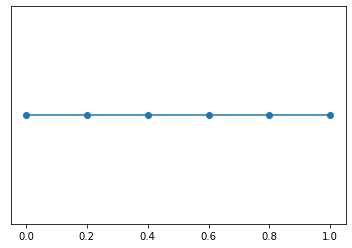

In [55]:
mesh = dl.UnitIntervalMesh(5)
dl.plot(mesh)

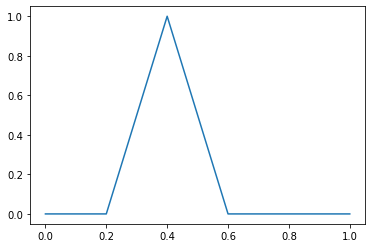

In [27]:
V = dl.FunctionSpace(mesh, 'CG', 1)
f = dl.Function(V)
f.vector()[3] = 1.0
dl.plot(f)

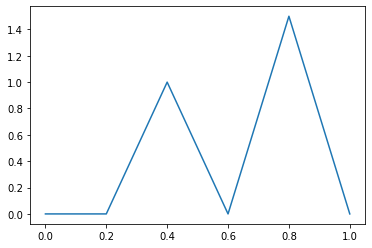

In [28]:
f.vector()[1] = 1.5
dl.plot(f)

Stiffness form
$$k(u,v) = \int_\Omega \nabla u \cdot \nabla v dx$$

In [29]:
u_trial = dl.TrialFunction(V)
v_test = dl.TestFunction(V)

stiffness_form = dl.inner(dl.grad(u_trial), dl.grad(v_test)) * dl.dx

print('u_trial=', u_trial)
print('v_test=', v_test)
print('stiffness_form=', stiffness_form)

u_trial= v_1
v_test= v_0
stiffness_form= { conj(((grad(v_0)) : (grad(v_1)))) } * dx(<Mesh #34>[everywhere], {})


Stiffness matrix (ignoring boundary conditions)
$$K_{ij} = k(\phi_i, \phi_j), \quad i=1,\dots,n, \quad, j=1,\dots,n$$

In [30]:
K = dl.assemble(stiffness_form)
K.array()

array([[ 5., -5.,  0.,  0.,  0.,  0.],
       [-5., 10., -5.,  0.,  0.,  0.],
       [ 0., -5., 10., -5.,  0.,  0.],
       [ 0.,  0., -5., 10., -5.,  0.],
       [ 0.,  0.,  0., -5., 10., -5.],
       [ 0.,  0.,  0.,  0., -5.,  5.]])

Right hand side form
$$rhs(v) = \int_\Omega f v dx$$

In [31]:
rhs_form = f * v_test * dl.dx
print('rhs_form=', rhs_form)

rhs_form= { v_0 * f_39 } * dx(<Mesh #34>[everywhere], {})


Right hand side vector

$$b_i = \int_\Omega f \phi_i dx, \quad i=1,\dots,n$$

In [32]:
b = dl.assemble(rhs_form)
b[:]

array([0.05      , 0.2       , 0.08333333, 0.13333333, 0.03333333,
       0.        ])

Dirichlet boundary conditions: 
$$u(0) = 10, \quad u(1) = 3$$

In [33]:
def left_boundary(x, on_boundary):
    if on_boundary and np.abs(x - 0.0) < 1e-8:
        return True
    else:
        return False

u_D_left = dl.Expression('10.0', degree=2)
    
def right_boundary(x, on_boundary):
    if on_boundary and np.abs(x - 1.0) < 1e-8:
        return True
    else:
        return False
    
u_D_right = dl.Expression('3.0', degree=2)
    
bc_left = dl.DirichletBC(V, u_D_left, left_boundary)
bc_right = dl.DirichletBC(V, u_D_right, right_boundary)
bcs = [bc_left, bc_right]

Assembled stiffness matrix and right hand side vector including boundary conditions, for
$$K u = b$$

In [34]:
print(K.array())

[[ 5. -5.  0.  0.  0.  0.]
 [-5. 10. -5.  0.  0.  0.]
 [ 0. -5. 10. -5.  0.  0.]
 [ 0.  0. -5. 10. -5.  0.]
 [ 0.  0.  0. -5. 10. -5.]
 [ 0.  0.  0.  0. -5.  5.]]


In [35]:
bc_left.apply(K)
print(K.array())

[[ 5. -5.  0.  0.  0.  0.]
 [-5. 10. -5.  0.  0.  0.]
 [ 0. -5. 10. -5.  0.  0.]
 [ 0.  0. -5. 10. -5.  0.]
 [ 0.  0.  0. -5. 10. -5.]
 [ 0.  0.  0.  0.  0.  1.]]


In [36]:
bc_right.apply(K)
print(K.array())

[[ 1.  0.  0.  0.  0.  0.]
 [-5. 10. -5.  0.  0.  0.]
 [ 0. -5. 10. -5.  0.  0.]
 [ 0.  0. -5. 10. -5.  0.]
 [ 0.  0.  0. -5. 10. -5.]
 [ 0.  0.  0.  0.  0.  1.]]


In [37]:
print(b[:])

[0.05       0.2        0.08333333 0.13333333 0.03333333 0.        ]


In [38]:
bc_left.apply(b)
print(b[:])

[ 0.05        0.2         0.08333333  0.13333333  0.03333333 10.        ]


In [39]:
bc_right.apply(b)
print(b[:])

[ 3.          0.2         0.08333333  0.13333333  0.03333333 10.        ]


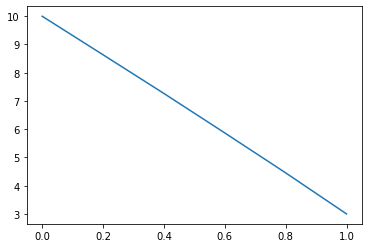

In [40]:
u = dl.Function(V)

dl.solve(K, u.vector(), b)

dl.plot(u)

Hmm, source is weak. Let's increase the magnitude of the source term

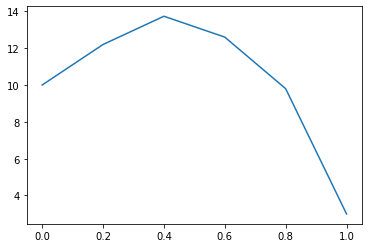

In [42]:
f.vector()[:] = 100*f.vector()

K = dl.assemble(stiffness_form)
b = dl.assemble(rhs_form)

bc_left.apply(K)
bc_left.apply(b)

bc_right.apply(K)
bc_right.apply(b)

dl.solve(K, u.vector(), b)

dl.plot(u)

Inhomogeneous stiffness

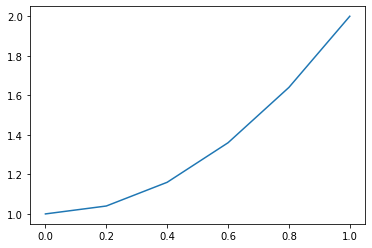

In [58]:
kappa = dl.Expression('1 + pow(x[0], 2)', degree=3)

dl.plot(kappa, mesh=mesh)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


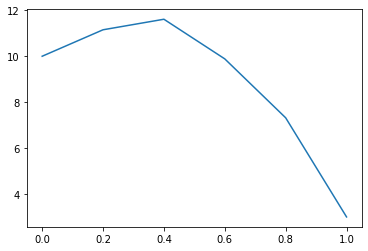

In [61]:
stiffness_form = kappa * dl.inner(dl.grad(u_trial), dl.grad(v_test)) * dl.dx

K = dl.assemble(stiffness_form)
b = dl.assemble(rhs_form)

bc_left.apply(K)
bc_left.apply(b)

bc_right.apply(K)
bc_right.apply(b)

dl.solve(K, u.vector(), b)

dl.plot(u)